In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-3.4268451088431107 9.927540408209751
-73.02329540717818 -132.99823899389256
34.711181226545435 0.6942078500812272
-83.54708519745009 -160.77457097589343
3.7530082736327586 19.57359567530881
12.346230397557804 -111.15504097930189
-32.56819298874823 60.79859973780532
-75.88433300645177 137.81771121696033
88.02074863903923 -81.58980996113233
-16.625408728849308 -54.98806004688694
-27.24413181530739 -81.72470752709302
-39.70527194410102 43.63792558306554
-8.542563393132795 115.36292276305846
-3.9014361755937017 1.9198756371791035
-26.18034916118809 -66.4721223620966
-42.8664229561596 142.88857261374864
73.77580538462286 -38.37248593039527
-28.3337658437527 151.57441231416942
-45.17234963502586 88.11504915788959
-68.50597158134875 -88.95663094471647
-69.14111221334578 -123.2463217448138
18.19022762443153 -64.74747841458841
21.287865665397945 95.49164372575308
-49.343464914873834 122.42544430360522
49.04839719633219 96.46552843001678
78.7291589673817 -27.24736123269784
49.910820859827226 -1

-38.65378526462621 -8.017278396334035
-61.263958018603354 93.66913327230418
8.430572992759537 -96.88276765258034
-10.62705944301598 20.354785726250384
38.39774789703941 -49.57489240531851
85.00120972093455 -128.2274236051768
-40.37582580634149 78.11980027142891
42.64820975677708 108.6881802155421
87.83379849283423 142.5043899449871
66.11648633914908 -133.30412415814618
-0.1490200994488191 25.53791582403477
-44.61433246741017 151.0380466413784
-44.585422516185936 68.29097091432999
83.87865475489554 31.273107181662624
-19.824790899561535 3.9443259247211415
44.179693082217085 -119.99030701803613
-15.307020375243951 143.18748202715142
72.54666800379982 58.14912689256019
-84.81951491119399 88.70060560428561
12.185266059834348 61.544637979054386
86.61809060546744 -109.36670280102818
29.80410070782642 -30.814905240912793
2.795342452373717 -154.01511288706644
-13.377882787069126 137.0667857502395
-12.086838585007698 -171.1319468210364
-68.6669774839256 24.011480146003237
-52.981873713828634 10

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | tsogni
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | sidi ali
Processing Record 4 of Set 13 | mataura
Processing Record 5 of Set 13 | gemena
Processing Record 6 of Set 13 | san patricio
Processing Record 7 of Set 13 | saint-philippe
Processing Record 8 of Set 13 | hobart
Processing Record 9 of Set 13 | qaanaaq
Processing Record 10 of Set 13 | rondonopolis
Processing Record 11 of Set 13 | coquimbo
Processing Record 12 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 13 | klungkung
Processing Record 14 of Set 13 | port-gentil
Processing Record 15 of Set 13 | tucuman
Processing Record 16 of Set 13 | burnie
Processing Record 17 of Set 13 | tasiilaq
Processing Record 18 of Set 13 | warwick
Processing Record 19 of Set 13 | busselton
Processing Record 20 of Set 13 | punta arenas
Processing Record 21 of Set 13 | road town
Processing Record 22 of Set 

Processing Record 31 of Set 16 | mpanda
Processing Record 32 of Set 16 | bowen
Processing Record 33 of Set 16 | faya
Processing Record 34 of Set 16 | grand gaube
Processing Record 35 of Set 16 | victoria
Processing Record 36 of Set 16 | miri
Processing Record 37 of Set 16 | mount isa
Processing Record 38 of Set 16 | clyde river
Processing Record 39 of Set 16 | liverpool
Processing Record 40 of Set 16 | moldava nad bodvou
Processing Record 41 of Set 16 | beyneu
Processing Record 42 of Set 16 | port elizabeth
Processing Record 43 of Set 16 | alofi
Processing Record 44 of Set 16 | nome
Processing Record 45 of Set 16 | borogontsy
Processing Record 46 of Set 16 | severo-kurilsk
Processing Record 47 of Set 16 | punta umbria
Processing Record 48 of Set 16 | viedma
Processing Record 49 of Set 16 | norman wells
Processing Record 50 of Set 16 | nelson bay
Processing Record 1 of Set 17 | mitsamiouli
Processing Record 2 of Set 17 | rocha
Processing Record 3 of Set 17 | wanxian
Processing Record 4 

Processing Record 20 of Set 20 | talara
Processing Record 21 of Set 20 | corinth
Processing Record 22 of Set 20 | belmonte
Processing Record 23 of Set 20 | moengo
Processing Record 24 of Set 20 | sitka
Processing Record 25 of Set 20 | paraiso
Processing Record 26 of Set 20 | atambua
Processing Record 27 of Set 20 | edson
Processing Record 28 of Set 20 | coahuayana
Processing Record 29 of Set 20 | akureyri
Processing Record 30 of Set 20 | werda
Processing Record 31 of Set 20 | moose factory
Processing Record 32 of Set 20 | arvada
Processing Record 33 of Set 20 | port blair
Processing Record 34 of Set 20 | vao
Processing Record 35 of Set 20 | mandalgovi
Processing Record 36 of Set 20 | manicore
Processing Record 37 of Set 20 | port hueneme
Processing Record 38 of Set 20 | sisimiut
Processing Record 39 of Set 20 | najran
Processing Record 40 of Set 20 | acapulco
Processing Record 41 of Set 20 | lucea
Processing Record 42 of Set 20 | kuznechnoye
Processing Record 43 of Set 20 | torbay
Proc

Processing Record 5 of Set 24 | cockburn town
Processing Record 6 of Set 24 | muros
Processing Record 7 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 24 | natchitoches
Processing Record 9 of Set 24 | mount pleasant
Processing Record 10 of Set 24 | pangnirtung
Processing Record 11 of Set 24 | karamken
City not found. Skipping...
Processing Record 12 of Set 24 | chepareria
Processing Record 13 of Set 24 | necochea
Processing Record 14 of Set 24 | fairbanks
Processing Record 15 of Set 24 | zabol
Processing Record 16 of Set 24 | portoferraio
Processing Record 17 of Set 24 | dauphin
Processing Record 18 of Set 24 | zhuhai
Processing Record 19 of Set 24 | duren
Processing Record 20 of Set 24 | taoudenni
Processing Record 21 of Set 24 | suntar
Processing Record 22 of Set 24 | ucluelet
Processing Record 23 of Set 24 | ketchikan
Processing Record 24 of Set 24 | jumla
Processing Record 25 of Set 24 | esfarayen
Processing Record 26 of Set 24 | bambanglipuro
Processing Record 27

In [27]:
len(city_data)

554

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tsogni,-2.7942,10.0988,69.89,88,1,8.12,GA,2022-06-20 21:47:53
1,Rikitea,-23.1203,-134.9692,70.52,59,85,11.88,PF,2022-06-20 21:47:54
2,Sidi Ali,36.0998,0.4206,75.18,51,93,0.94,DZ,2022-06-20 21:47:54
3,Mataura,-46.1927,168.8643,31.48,90,5,2.48,NZ,2022-06-20 21:47:54
4,Gemena,3.2500,19.7667,68.16,99,73,1.05,CD,2022-06-20 21:47:55
5,San Patricio,28.0170,-97.5169,98.19,38,8,15.82,US,2022-06-20 21:47:55
6,Saint-Philippe,-21.3585,55.7679,63.99,68,88,9.51,RE,2022-06-20 21:47:55
7,Hobart,-42.8794,147.3294,50.25,86,0,0.00,AU,2022-06-20 21:43:26
8,Qaanaaq,77.4840,-69.3632,37.44,78,99,2.89,GL,2022-06-20 21:47:56
9,Rondonopolis,-16.4708,-54.6356,79.81,36,4,1.88,BR,2022-06-20 21:43:30


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]                                                                                                                                        
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tsogni,GA,2022-06-20 21:47:53,-2.7942,10.0988,69.89,88,1,8.12
1,Rikitea,PF,2022-06-20 21:47:54,-23.1203,-134.9692,70.52,59,85,11.88
2,Sidi Ali,DZ,2022-06-20 21:47:54,36.0998,0.4206,75.18,51,93,0.94
3,Mataura,NZ,2022-06-20 21:47:54,-46.1927,168.8643,31.48,90,5,2.48
4,Gemena,CD,2022-06-20 21:47:55,3.2500,19.7667,68.16,99,73,1.05
5,San Patricio,US,2022-06-20 21:47:55,28.0170,-97.5169,98.19,38,8,15.82
6,Saint-Philippe,RE,2022-06-20 21:47:55,-21.3585,55.7679,63.99,68,88,9.51
7,Hobart,AU,2022-06-20 21:43:26,-42.8794,147.3294,50.25,86,0,0.00
8,Qaanaaq,GL,2022-06-20 21:47:56,77.4840,-69.3632,37.44,78,99,2.89
9,Rondonopolis,BR,2022-06-20 21:43:30,-16.4708,-54.6356,79.81,36,4,1.88


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

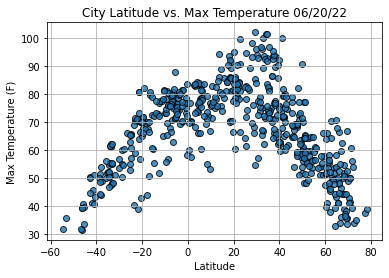

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

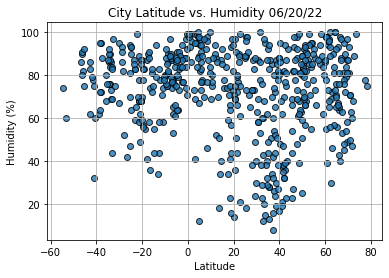

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

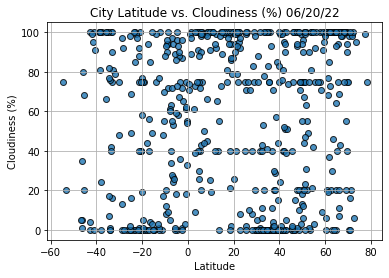

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

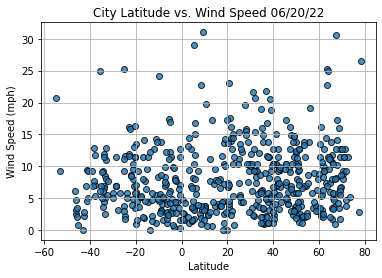

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
